### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import logging

# Using 'info' for ansewrs to questions asked by the instructors
# and 'debug' for debug traces.
logging.basicConfig(level=logging.DEBUG)


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
nulls = df.isnull().sum()

# Series doesn't support loc, so filtering this way insetad.
nulls = nulls[nulls > 0].sort_values(ascending=False)

logging.info(f"total rows: {len(df)}\n")
logging.info(f"total nulls:\n{nulls}\n")

INFO:root:total rows: 12684

INFO:root:total nulls:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64



3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
cleansed_df = df.copy()

# Drop column that is almost all nulls + small # of rows with nulls. 
cleansed_df = cleansed_df.drop(columns = 'car').dropna()
cleansed_df.rename(columns={'passanger' : 'passenger'}, inplace=True)

# Transform age into a number; avoid NaN's 
logging.debug(cleansed_df['age'].value_counts())
age_replacements = {
    '50plus' : '50',
    'below21': '21'
}
cleansed_df = cleansed_df.replace(age_replacements)
cleansed_df['age'] = pd.to_numeric(cleansed_df['age'])

# Quick look at some other parts of the data.
logging.debug(cleansed_df['CarryAway'].value_counts())
logging.debug(cleansed_df['coupon'].value_counts())

DEBUG:root:age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64
DEBUG:root:CarryAway
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64
DEBUG:root:coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [7]:
# Since the values are all 1's and 0's we can use mean to get the percentage of 1's.
pct_total_accepted_coupons = cleansed_df['Y'].mean()

logging.info(f"Percentage of total who accepted the coupon: {pct_total_accepted_coupons}")


INFO:root:Percentage of total who accepted the coupon: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jelanigould-bailey/opt/anaconda3/lib/python3.13/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jelanigould-bailey/opt/anaconda3/lib/python3.13/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jelanigould-bailey/opt/a

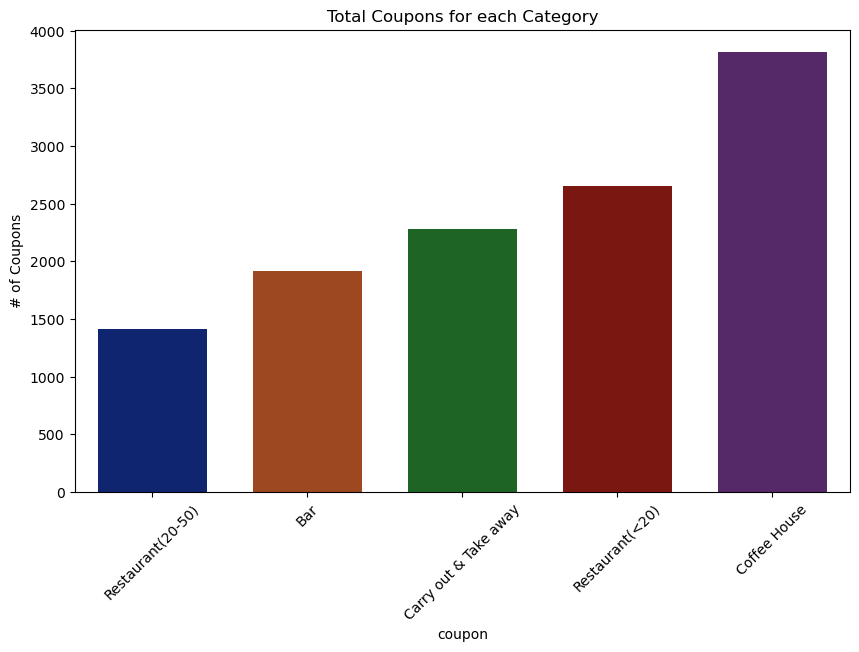

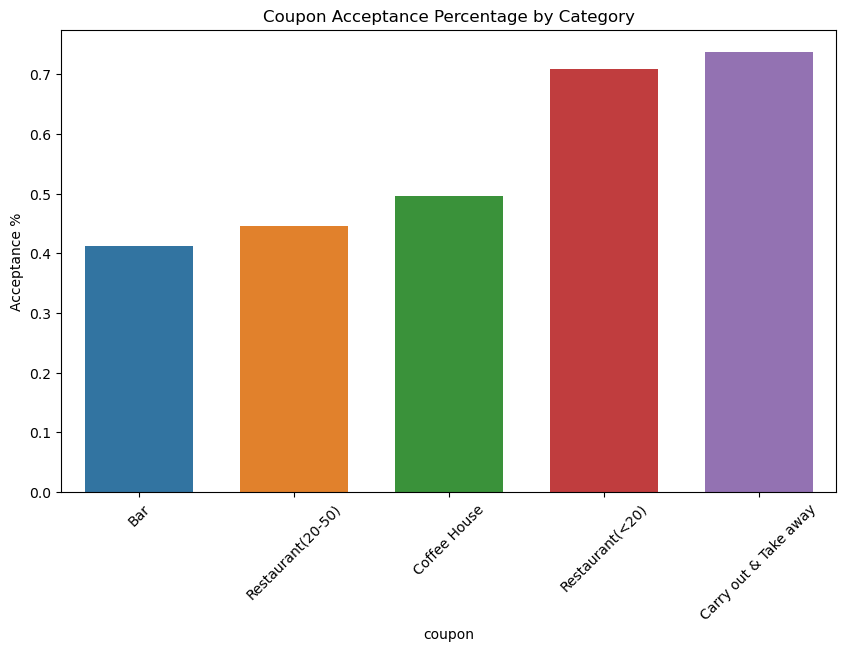

In [ ]:
# Visualize distribution of coupons by cateogry count and also by percentage accepted. 
total_coupons = cleansed_df['coupon'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
bar_plot1 = sns.barplot(data=total_coupons, palette='dark', width=0.7, ax=ax)
bar_plot1.set_title("Total Coupons for each Category")
ax.set_ylabel("# of Coupons")
plt.xticks(rotation=45, horizontalalignment='center')
plt.savefig('images/generated/total_coupons_barplot.png')
plt.show()

pct_accepted_sorted = cleansed_df.groupby('coupon').agg({'Y': 'mean'}).sort_values(by='Y', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot2 = sns.barplot(data=pct_accepted_sorted, x='coupon', y='Y', hue='coupon', width=0.7, ax=ax)
bar_plot2.set_title("Coupon Acceptance Percentage by Category")
ax.set_ylabel("Acceptance %")
plt.xticks(rotation=45, horizontalalignment='center')
plt.savefig('images/generated/pct_coupons_accepted_barplot.png')
plt.show()


6. Use a histogram to visualize the temperature column.

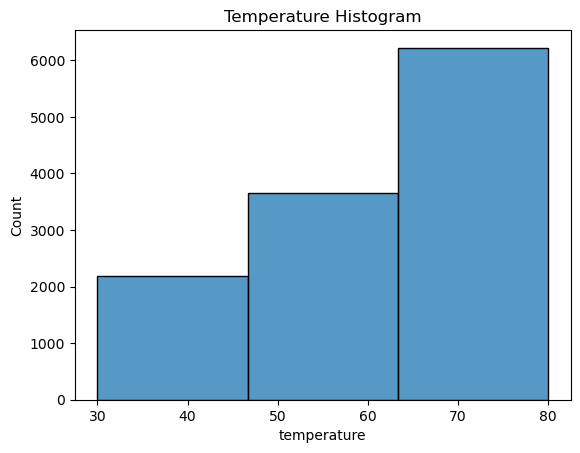

In [9]:
# Note: tempoerature isn't continuous range
hist = sns.histplot(data=cleansed_df, x='temperature', bins=3)
hist.set_title("Temperature Histogram")
plt.savefig('images/generated/temperature_hist.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Clean copy we can modify as needed.
bar_df = cleansed_df.loc[cleansed_df['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [11]:
#TODO(jelani): Add plot -- will need to store as df and reset_index()

# Yes valuse are all 1's and 0's so mean will give us the correct percentage.
pct_bar_coupons_accepted = bar_df['Y'].mean()

logging.info(f"percentage of bar coupons accepted: {pct_bar_coupons_accepted}")

INFO:root:percentage of bar coupons accepted: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
#TODO(jelani): Add plot -- will need to store as df and reset_index()

bar_df['gt_3_bar_visits'] = bar_df['Bar'].apply(lambda x: 1 if (x == '4~8' or x == 'gt8') else 0)

pct_bar_coupons_accepted_visit_gt3 = bar_df.groupby('gt_3_bar_visits')['Y'].mean()

# Acceptance rate is ~2x higher for drivers with >3 bar visits.
logging.info(f"Acceptance rate for > 3 bar visits: { pct_bar_coupons_accepted_visit_gt3.iloc[1]}, <= 3 bar visits: {pct_bar_coupons_accepted_visit_gt3.iloc[0]}")

# Start tracking results across analysis categories for easier comparison later.
acceptance_rates_comparison = {
    'bar_acceptance_gt3': pct_bar_coupons_accepted_visit_gt3.iloc[1],
    'bar_acceptance_lte3': pct_bar_coupons_accepted_visit_gt3.iloc[0]
}

INFO:root:Acceptance rate for > 3 bar visits: 0.7616580310880829, <= 3 bar visits: 0.37267441860465117


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
#TODO(jelani): Add plot -- will need to store as df and reset_index()

logging.debug(bar_df['age'].value_counts())

# Assuming that >1 month is in set 1~3 (b/c there is a less1 set as well)
bar_visit_gt1_filter = ((bar_df['Bar'] != 'never') | (bar_df['Bar'] != 'less1'))
bar_filter_q4 = (bar_df['age'] > 25) & bar_visit_gt1_filter

bar_results_q4 = bar_df.loc[bar_filter_q4].agg({ 'Y': 'mean'})

bar_acceptance_age_gt25 = bar_results_q4.iloc[0]
bar_acceptance_total = bar_df.agg({ 'Y': 'mean'}).iloc[0]

# Conclustion: Drivers older than 25 who go to a bar > 1 month ~2% lower acceptance rate vs. all who accepted coupon.
acceptance_rates_comparison['bar_acceptance_age_gt25'] = bar_acceptance_age_gt25
acceptance_rates_comparison['bar_acceptance_total'] = bar_acceptance_total


DEBUG:root:age
21    478
26    368
31    324
50    273
36    196
41    171
46    103
Name: count, dtype: int64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
# TODO(jelani): switch from .loc[] to query(), using @ syntax for exclusions

logging.debug(bar_df['occupation'].unique())

bar_no_kid_passengers_filter = (bar_df['passenger'] != 'Kid(s)')
bar_occupations_no_farm_fish_forestry_filter = (bar_df['occupation'] != 'Farming Fishing & Forestry')
bar_filter_q5 = (bar_visit_gt1_filter & bar_no_kid_passengers_filter & bar_occupations_no_farm_fish_forestry_filter)

bar_results_q5 = bar_df.loc[bar_filter_q5].agg({'Y': 'mean'})

logging.debug(bar_results_q5)
acceptance_rates_comparison['bar_acceptance_q5'] = bar_results_q5.iloc[0]


DEBUG:root:['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']
DEBUG:root:Y    0.43491
dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [15]:
# Switching to using .query() going forward as is easier vs. loc[] 
logging.debug(bar_df['income'].sort_values().unique())

bar_frequency_excludes = ['never', 'less1']
passenger_excludes = ['Kid(s)']
marital_status_excludes = ['Widowed']
restaurant_includes = ['4~8', 'gt8']
income_includes = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

bar_query_q6a = ('Bar not in @bar_frequency_excludes and passenger not in @passenger_excludes '
                 'and maritalStatus not in @marital_status_excludes')
bar_query_q6b = 'Bar not in @bar_frequency_excludes and age < 30'
bar_query_q6c = 'RestaurantLessThan20 in @restaurant_includes and income in @income_includes'

bar_q6a_results = bar_df.query(bar_query_q6a)['Y'].mean()
bar_q6b_results = bar_df.query(bar_query_q6b)['Y'].mean()
bar_q6c_results = bar_df.query(bar_query_q6c)['Y'].mean()

acceptance_rates_comparison['bar_acceptance_q6a'] = bar_q6a_results
acceptance_rates_comparison['bar_acceptance_q6b'] = bar_q6b_results
acceptance_rates_comparison['bar_acceptance_q6c'] = bar_q6c_results

logging.debug(acceptance_rates_comparison)


DEBUG:root:['$100000 or More' '$12500 - $24999' '$25000 - $37499' '$37500 - $49999'
 '$50000 - $62499' '$62500 - $74999' '$75000 - $87499' '$87500 - $99999'
 'Less than $12500']
DEBUG:root:{'bar_acceptance_gt3': np.float64(0.7616580310880829), 'bar_acceptance_lte3': np.float64(0.37267441860465117), 'bar_acceptance_age_gt25': np.float64(0.38606271777003487), 'bar_acceptance_total': np.float64(0.41191845269210664), 'bar_acceptance_q5': np.float64(0.4349095154699358), 'bar_acceptance_q6a': np.float64(0.7094339622641509), 'bar_acceptance_q6b': np.float64(0.7195121951219512), 'bar_acceptance_q6c': np.float64(0.46153846153846156)}


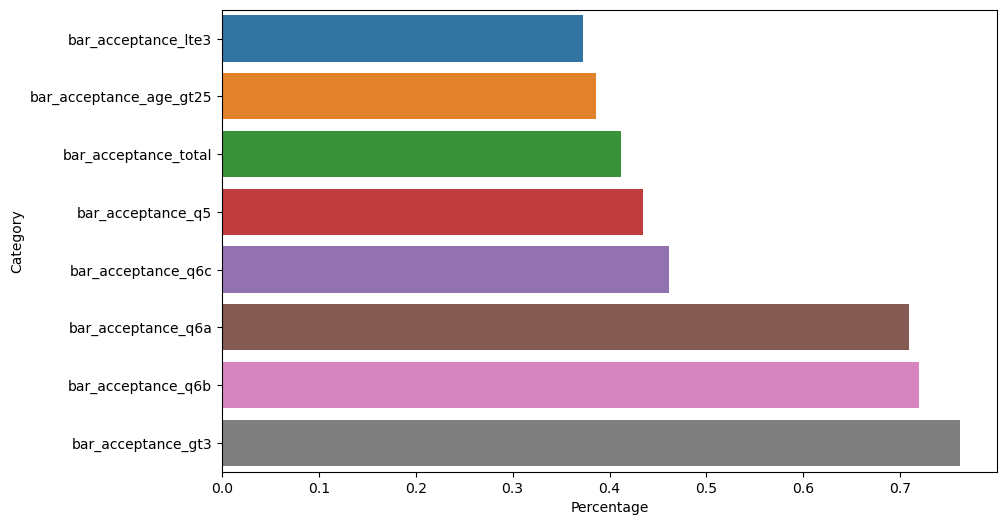

INFO:root:{'bar_acceptance_gt3': np.float64(0.7616580310880829), 'bar_acceptance_lte3': np.float64(0.37267441860465117), 'bar_acceptance_age_gt25': np.float64(0.38606271777003487), 'bar_acceptance_total': np.float64(0.41191845269210664), 'bar_acceptance_q5': np.float64(0.4349095154699358), 'bar_acceptance_q6a': np.float64(0.7094339622641509), 'bar_acceptance_q6b': np.float64(0.7195121951219512), 'bar_acceptance_q6c': np.float64(0.46153846153846156)}
DEBUG:root:bar_acceptance_gt3: 0.7616580310880829
DEBUG:root:bar_acceptance_lte3: 0.37267441860465117
DEBUG:root:bar_acceptance_age_gt25: 0.38606271777003487
DEBUG:root:bar_acceptance_total: 0.41191845269210664
DEBUG:root:bar_acceptance_q5: 0.4349095154699358
DEBUG:root:bar_acceptance_q6a: 0.7094339622641509
DEBUG:root:bar_acceptance_q6b: 0.7195121951219512
DEBUG:root:bar_acceptance_q6c: 0.46153846153846156


In [98]:
# Plot the different results.

acceptance_rates_comparison_df = pd.DataFrame(list(acceptance_rates_comparison.items()), 
                                              columns=['Category', 'Percentage']).sort_values(
                                                by='Percentage', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=acceptance_rates_comparison_df, x='Percentage', y='Category', hue='Category')
plt.savefig('images/generated/acceptance_rates_comparison_barplot.png')
plt.show()


logging.info(acceptance_rates_comparison)
for key, value in acceptance_rates_comparison.items():
    logging.debug(f"{key}: {value}")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the data analyzed so far, there were 3 groups of drivers who go to bars more than once a month that had much \
higher acceptance rates for Bar coupons relative to all other categories of drivers who accepted bar coupons. 

They are:

1. Drivers who go to bars more than 3 times a month (76%)
1. Drivers who go to bars more than once a month and are under the age of 30 (72%)
1. Drivers who go to bars more than once a month, had passengers that were not a kid, and are not widowed (71%)

All 3 of these groups had bar coupon acceptance rates well above the mean bar coupon acceptance rate (~ 40%) across the \
population of drivers who accepted bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### What I will focus on:

I'll take a brief look at 3 sets of data to determine where to focus in more detail:

1. **Drivers who were offered Coffee House coupons:**  I found this group interesting because it has \
the highest number of coupons offered but only the median acceptance rate.

1. **Drivers who were offered Carry Out & Take Away coupons:**  I found this group interesting because \
they had the opposite pattern -- median number of coupons offered but highest acceptance rate.

1. **Distance from coupon location** I'm curious to see if there are any trends or patterns that become \
evident when looking at coupon acceptance rates across all categories paired with data on distance from \
the coupon location.

In [46]:
# Prep the new data.
coffee_df = cleansed_df.query('coupon == "Coffee House"')
takeout_df = cleansed_df.query('coupon == "Carry out & Take away"')
distance_df = cleansed_df.copy()


def get_distance_category(row):
    if (row['toCoupon_GEQ25min'] > 0):
        return 'distance_GEQ25min'
    elif (row['toCoupon_GEQ15min'] > 0):
        return 'distance_GEQ15min'
    elif (row['toCoupon_GEQ5min'] > 0):
        return 'distance_GEQ5min'
    else:
        return 'distance_unknown'

# Create a single column consolidating distance to coupon, for easier plotting.
distance_df['distance_category'] = distance_df.apply(get_distance_category, axis=1)



/var/folders/br/g3_j01yj5pv39n2g5sml60f00000gn/T/ipykernel_26570/1540630888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


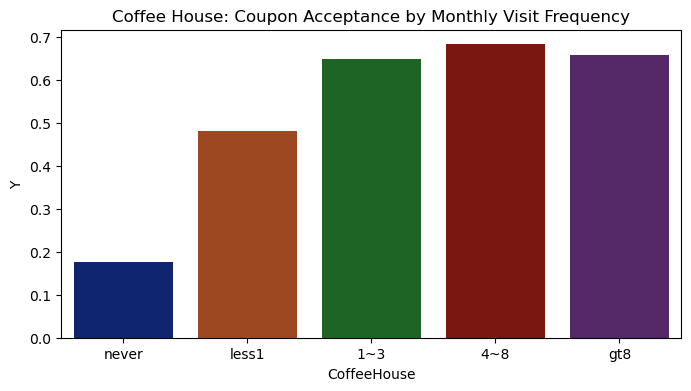

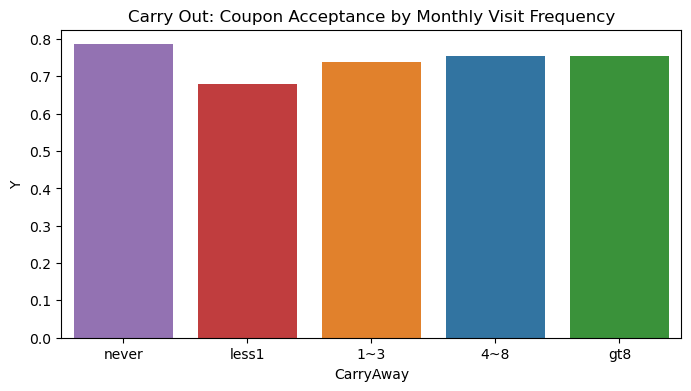

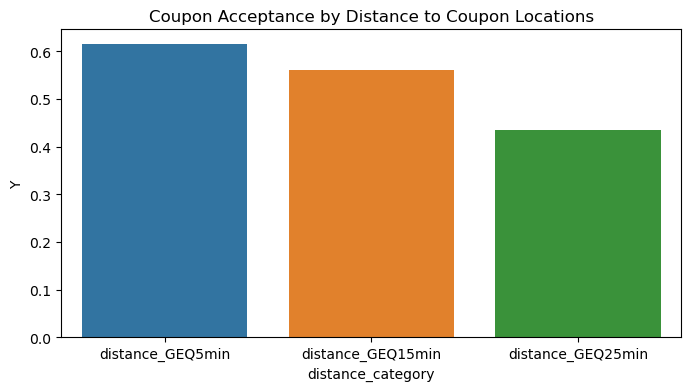

In [60]:
VISIT_FREQUENCY_ORDER = ['never', 'less1', '1~3', '4~8', 'gt8']
DISTANCE_CATEGORY_ORDER = ['distance_GEQ5min', 'distance_GEQ15min', 'distance_GEQ25min']

fig, ax1 = plt.subplots(figsize=(8, 4))
sns.barplot(
    data = coffee_df, x='CoffeeHouse', y='Y', order=VISIT_FREQUENCY_ORDER, 
    palette='dark',  errorbar=None, ax=ax1)
ax1.set_title("Coffee House: Coupon Acceptance by Monthly Visit Frequency")
plt.savefig('images/generated/coffeehouse_frequency_acceptance_barplot.png')
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 4))
sns.barplot(
    data = takeout_df, x='CarryAway', y='Y', order=VISIT_FREQUENCY_ORDER, 
    hue='CarryAway',  errorbar=None, ax=ax2)
ax2.set_title("Carry Out: Coupon Acceptance by Monthly Visit Frequency")
plt.savefig('images/generated/carryout_frequency_acceptance_barplot.png')
plt.show()


fig, ax3 = plt.subplots(figsize=(8, 4))
sns.barplot(
    data = distance_df, x='distance_category', y='Y', order=DISTANCE_CATEGORY_ORDER, 
    hue='distance_category', errorbar=None, ax=ax3)
ax3.set_title("Coupon Acceptance by Distance to Coupon Locations")
plt.savefig('images/generated/coupons_distance_barplot.png')
plt.show()



After looking at all 3 plots, I decided to look more deeply into the Coffee House group. I found the distribution by frequency more interesting \
than in the carryout set, where the acceptance rate was pretty similar across categories.

The distance plot showed what I would've exepcted, which is that the acceptance rate decreses the further away from the coupon location, in a \
relatively linear fashion.

In [ ]:
logging.debug(coffee_df.columns)
logging.debug(coffee_df['age'].sort_values().unique())

frequent_includes = ['1~3']
infrequent_includes = ['never', 'less1']

pct_coffee_all = coffee_df['Y'].mean()
logging.debug(pct_coffee_all)

# 7a: frequent + aged under 26:
df_7a = coffee_df.query('CoffeeHouse in @frequent_includes and age <= 26')
result_7a = df_7a['Y'].mean()

# 7b: frequent + aged 36-45:
df_7b = coffee_df.query('CoffeeHouse in @frequent_includes and age >= 36 and age <=45')
result_7b = df_7b['Y'].mean()

#7c: frequent + aged 46 or over:
df_7c = coffee_df.query('CoffeeHouse in @frequent_includes and age >= 46')
result_7c = df_7c['Y'].mean()

#7d: infrequent + men:
df_7d = coffee_df.query('CoffeeHouse in @infrequent_includes and gender == "Male"')
result_7d = df_7d['Y'].mean()

#7e infrequent + wommen:
df_7e = coffee_df.query('CoffeeHouse in @infrequent_includes and gender == "Female"')
result_7e = df_7e['Y'].mean()


coffee_acceptance_rates = {
    'pct_coffee_all' : pct_coffee_all,
    'result_7a': result_7a,
    'result_7b': result_7b,
    'result_7c': result_7c,
    'result_7d': result_7d,
    'result_7e': result_7e,
}


logging.debug(coffee_acceptance_rates)

DEBUG:root:Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
DEBUG:root:[21 26 31 36 41 46 50]
DEBUG:root:0.49633123689727465
DEBUG:root:{'pct_coffee_all': np.float64(0.49633123689727465), 'result_7a': np.float64(0.6903460837887068), 'result_7b': np.float64(0.5303867403314917), 'result_7c': np.float64(0.656), 'result_7d': np.float64(0.37228541882109617), 'result_7e': np.float64(0.308868501529052)}


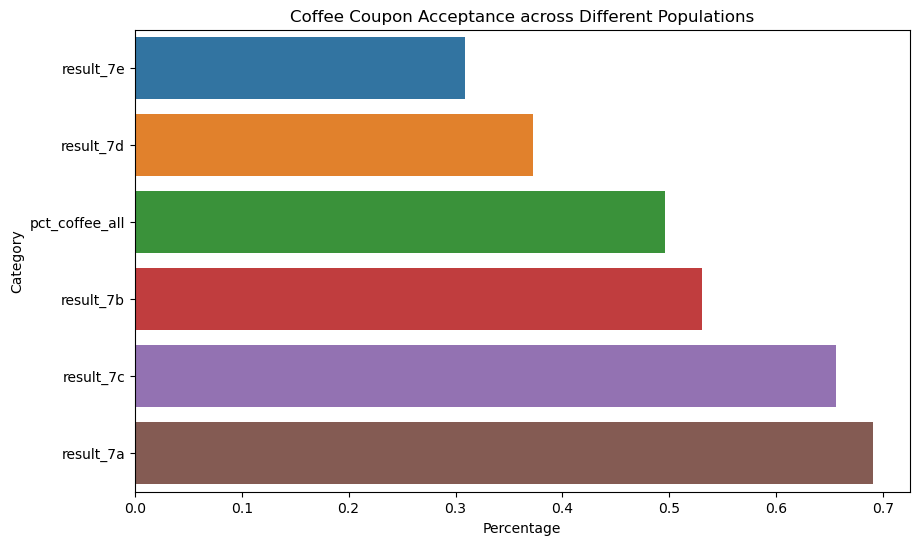

INFO:root:{'pct_coffee_all': np.float64(0.49633123689727465), 'result_7a': np.float64(0.6903460837887068), 'result_7b': np.float64(0.5303867403314917), 'result_7c': np.float64(0.656), 'result_7d': np.float64(0.37228541882109617), 'result_7e': np.float64(0.308868501529052)}
DEBUG:root:pct_coffee_all: 0.49633123689727465
DEBUG:root:result_7a: 0.6903460837887068
DEBUG:root:result_7b: 0.5303867403314917
DEBUG:root:result_7c: 0.656
DEBUG:root:result_7d: 0.37228541882109617
DEBUG:root:result_7e: 0.308868501529052


In [112]:
# Plot the different results.
coffee_acceptance_rates_comparison_df = pd.DataFrame(
    list(coffee_acceptance_rates.items()), columns=['Category', 'Percentage']).sort_values(
        by='Percentage', ascending=True)
fig7, ax7 = plt.subplots(figsize=(10, 6))
ax7 = sns.barplot(
    data=coffee_acceptance_rates_comparison_df, x='Percentage', y='Category', hue='Category')
ax7.set_title("Coffee Coupon Acceptance across Different Populations")
plt.savefig('images/generated/coffee_acceptance_rates_comparison_barplot.png')
plt.show()


logging.info(coffee_acceptance_rates)
for key, value in coffee_acceptance_rates.items():
    logging.debug(f"{key}: {value}")

## Conclusions

After further examing data on drivers who were offered a CoffeeHouse coupon, I was able to draw some conclusions:

- The mean acceptance rate among all drivers offered a CoffeeHouse coupon was 50%
- Drivers who visited 1-3 times / month and were age 26 & younger, or age 46 & older, had the highest acceptance \
rates (66% for 46 & older, 69% for 26 or younger)
- Drivers who visited 1-3 times / month and were age 36-45, had a relatively lower acceptnace rate (53%)
- Drivers who rarely visited during their month (less than 1 visit or never) had the lowest acceptance rates. \
Men in this group had a 37% acceptance rate, while women in this group had a 30% acceptance rate.

I would interpret these results as indicating that drivers who already like coffee frequently enough to visit \
a coffee shop a few times a month are generally much more interested in the coupon.

For drivers who rarely or never visit, roughly a third of them accept the coupon. So depending on the costs of \
running the coupon, and the anticipated sales revenue generated from it, the coffee shop owners may decide that a \
1/3 acceptance rate is good ROI.

If so, they may decide to market more heavily to men than women in this group, given the higher acceptance \
rate for the men (37% vs. 31% for the women)